In [48]:
# !pip freeze > requirements.txt

**CAPITULO 20: ANALISIS EXPLORATORIO UNIVARIADO**

In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
# df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [50]:
df = pd.read_csv("data/titanic.csv")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [52]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


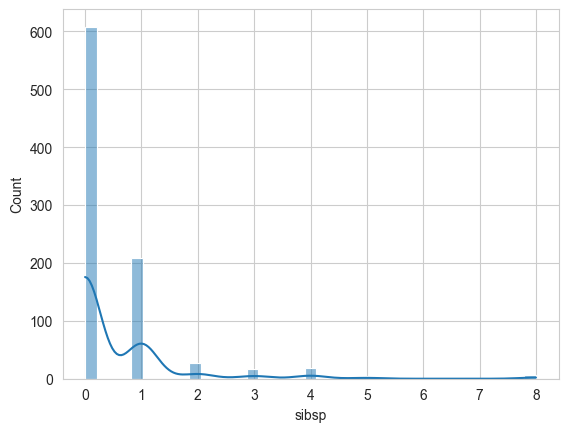

In [53]:
#Analisis univariado
sns.histplot(data=df, x="sibsp", kde=True)
plt.show()

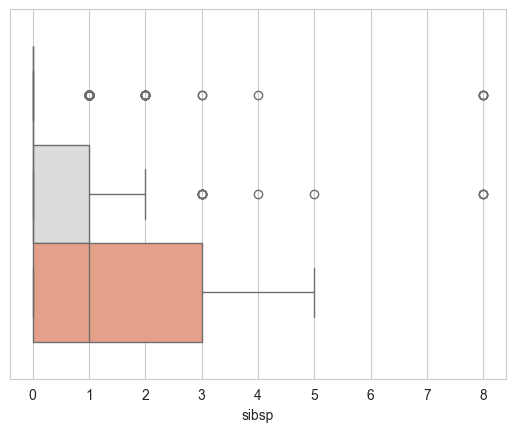

In [54]:
palette = sns.color_palette("coolwarm", n_colors=3)

sns.boxplot(x='sibsp', data=df, hue='who', palette=palette, legend=False)
plt.show()

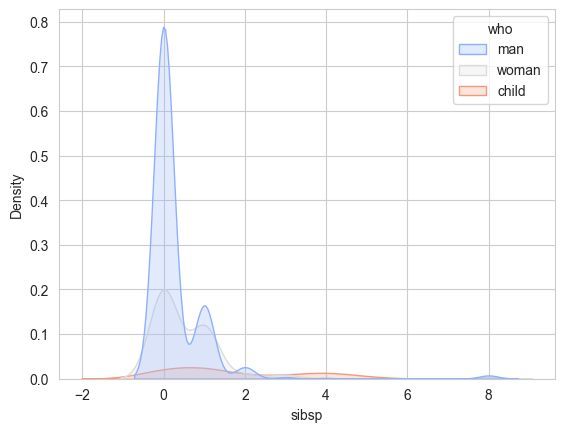

In [55]:
palette = sns.color_palette("coolwarm", n_colors=3)
sns.kdeplot(data=df, x="sibsp", hue="who", fill=True, palette=palette)
plt.show()

**CAPITULO 21: ANALISIS EXPLORATORIO BIVARIADO Y MULTIVARIADO**

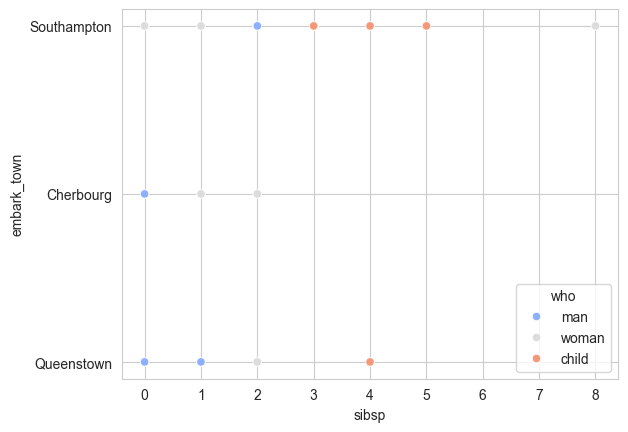

In [56]:
sns.scatterplot(data=df, x="sibsp", y="embark_town", hue="who", palette=palette)
plt.show()

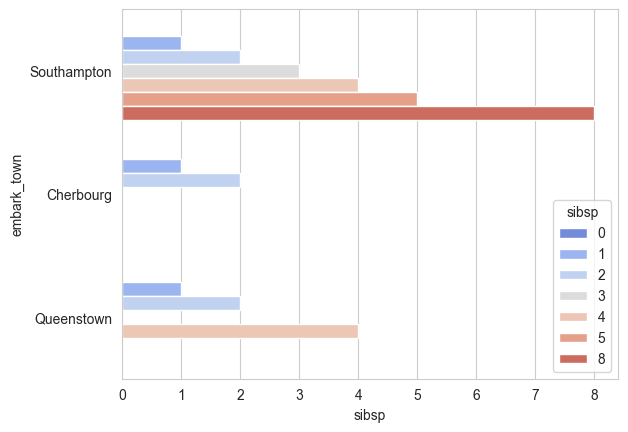

In [57]:
palette = sns.color_palette("coolwarm", n_colors=7)
sns.barplot(data=df, x="sibsp", y="embark_town", hue="sibsp", palette=palette)
plt.show()

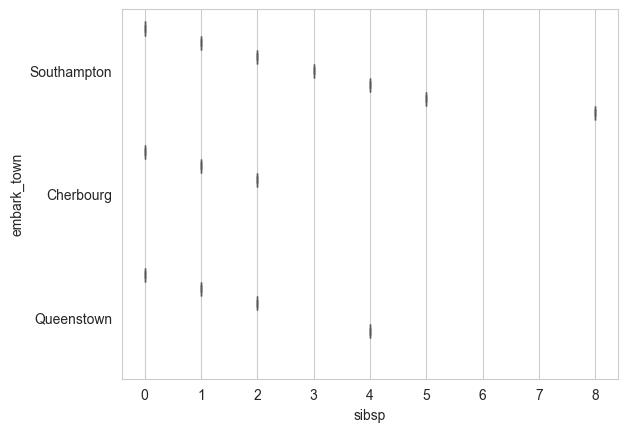

In [58]:
sns.boxplot(x='sibsp', y='embark_town', data=df, hue='sibsp', palette=palette, legend=False)
plt.show()

**analisis multivariado**

In [59]:
# sns.pairplot(df, hue="cut", palette=palette)

**CAPITULO 22: CASO PRACTICO**

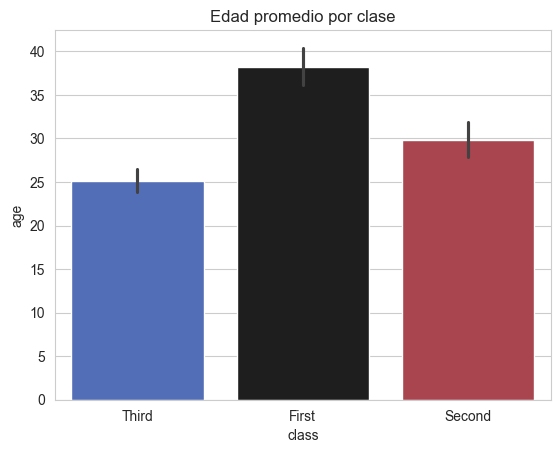

In [60]:
#grafico de barras de edad promedio por clase
palette = sns.color_palette("icefire", n_colors=3)
sns.barplot(data=df, x="class", y="age", hue="class", palette=palette, legend=False)
plt.title("Edad promedio por clase")
plt.show()


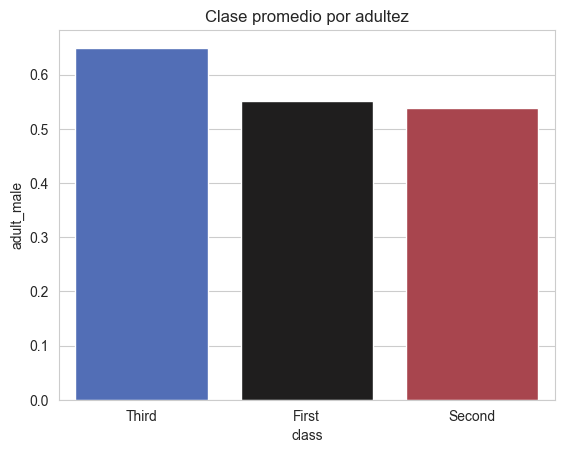

In [61]:
#grafico de barras de clase promedio por adultez
palette = sns.color_palette("icefire", n_colors=3)
sns.barplot(data=df, x="class", y="adult_male", hue="class", palette=palette, legend=False, errorbar=None)
plt.title("Clase promedio por adultez")
plt.show()


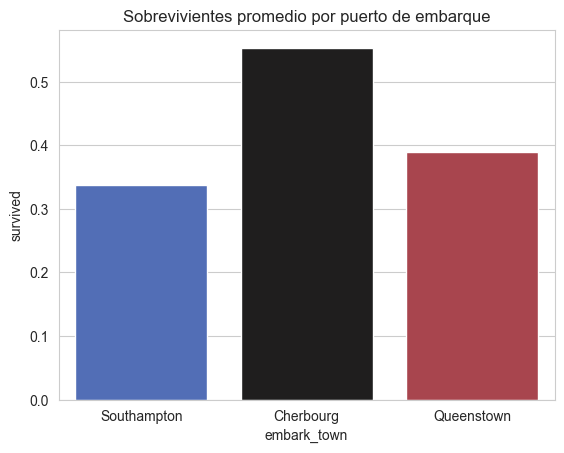

In [62]:
#grafico de barras de sobrevivientes promedio por puerto de embarque
palette = sns.color_palette("icefire", n_colors=3)
sns.barplot(data=df, x="embark_town", y="survived", hue="embark_town", palette=palette, legend=False, errorbar=None)
plt.title("Sobrevivientes promedio por puerto de embarque")
plt.show()


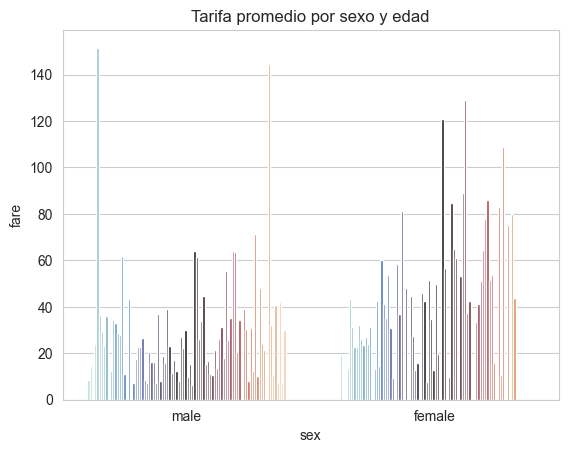

In [63]:
#grafico promedio de tarifa por sexo y edad
palette = sns.color_palette("icefire", n_colors=88)
sns.barplot(data=df, x="sex", y="fare", hue="age", palette=palette, legend=False, errorbar=None)
plt.title("Tarifa promedio por sexo y edad")
plt.show()

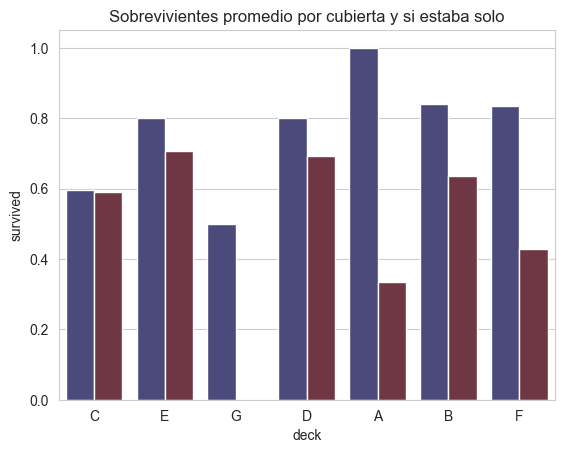

In [64]:
#grafico de barras de sobrevivientes promedio por cubierta y si estaba solo
palette = sns.color_palette("icefire", n_colors=2)
sns.barplot(data=df, x="deck", y="survived", hue="alone", palette=palette, legend=False, errorbar=None)
plt.title("Sobrevivientes promedio por cubierta y si estaba solo")
plt.show()

In [65]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [66]:
# calcula el porcentaje de tarifa pagada respecto al total
df['fare_percentage'] = df['fare'] / df['fare'].sum() * 100
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_percentage
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.025267
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.248426
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.027619
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.185056
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.028055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.045306
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0.104552
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.081725
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.104552


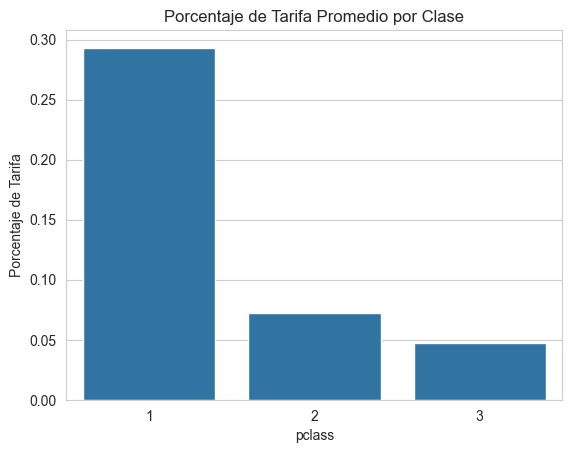

In [67]:
#grafico de barras de porcentaje de tarifa promedio por clase
sns.barplot(x='pclass', y='fare_percentage', data=df, errorbar=None)
plt.title('Porcentaje de Tarifa Promedio por Clase')
plt.ylabel('Porcentaje de Tarifa')
plt.show()

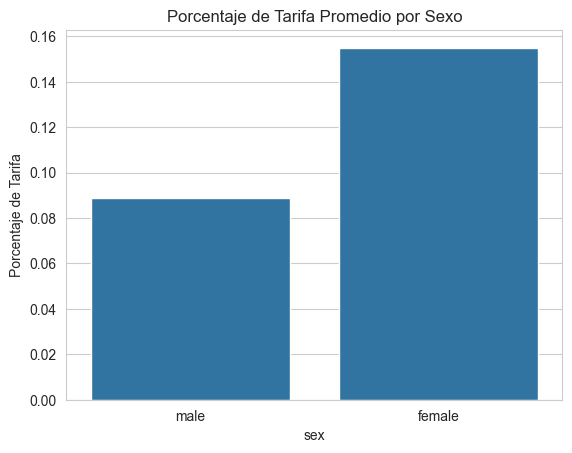

In [68]:
#grafico de barras de porcentaje de tarifa promedio por sexo
sns.barplot(x='sex', y='fare_percentage', data=df, errorbar=None)
plt.title('Porcentaje de Tarifa Promedio por Sexo')
plt.ylabel('Porcentaje de Tarifa')
plt.show()

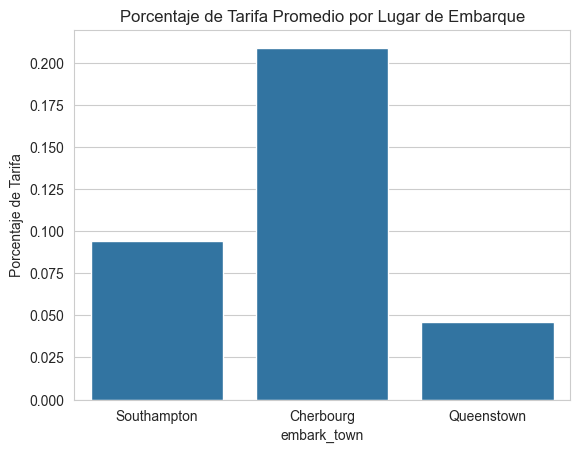

In [69]:
#grafico de barras de porcentaje de tarifa promedio por lugar de embarque
sns.barplot(x='embark_town', y='fare_percentage', data=df, errorbar=None)
plt.title('Porcentaje de Tarifa Promedio por Lugar de Embarque')
plt.ylabel('Porcentaje de Tarifa')
plt.show()

**CAPITULO 23: CONTINUANDO CON UN CASO PRACTICO**

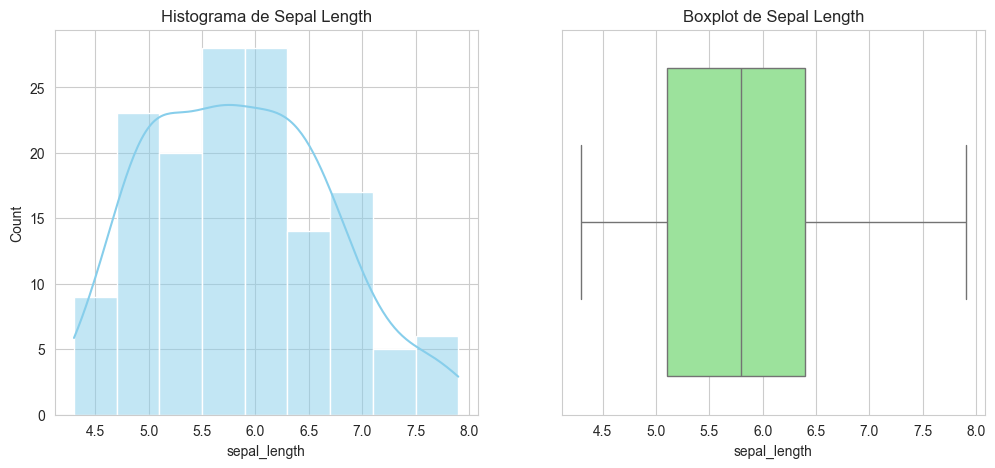

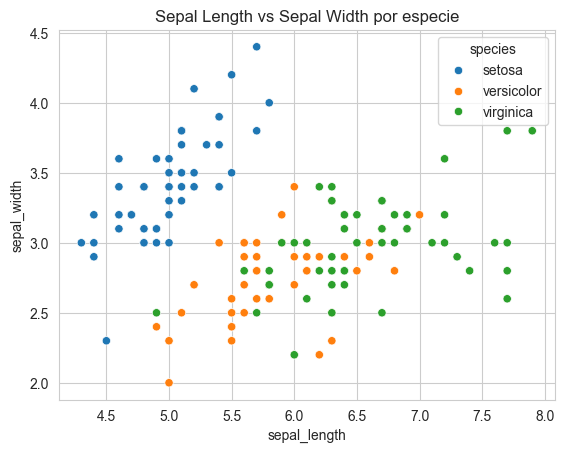

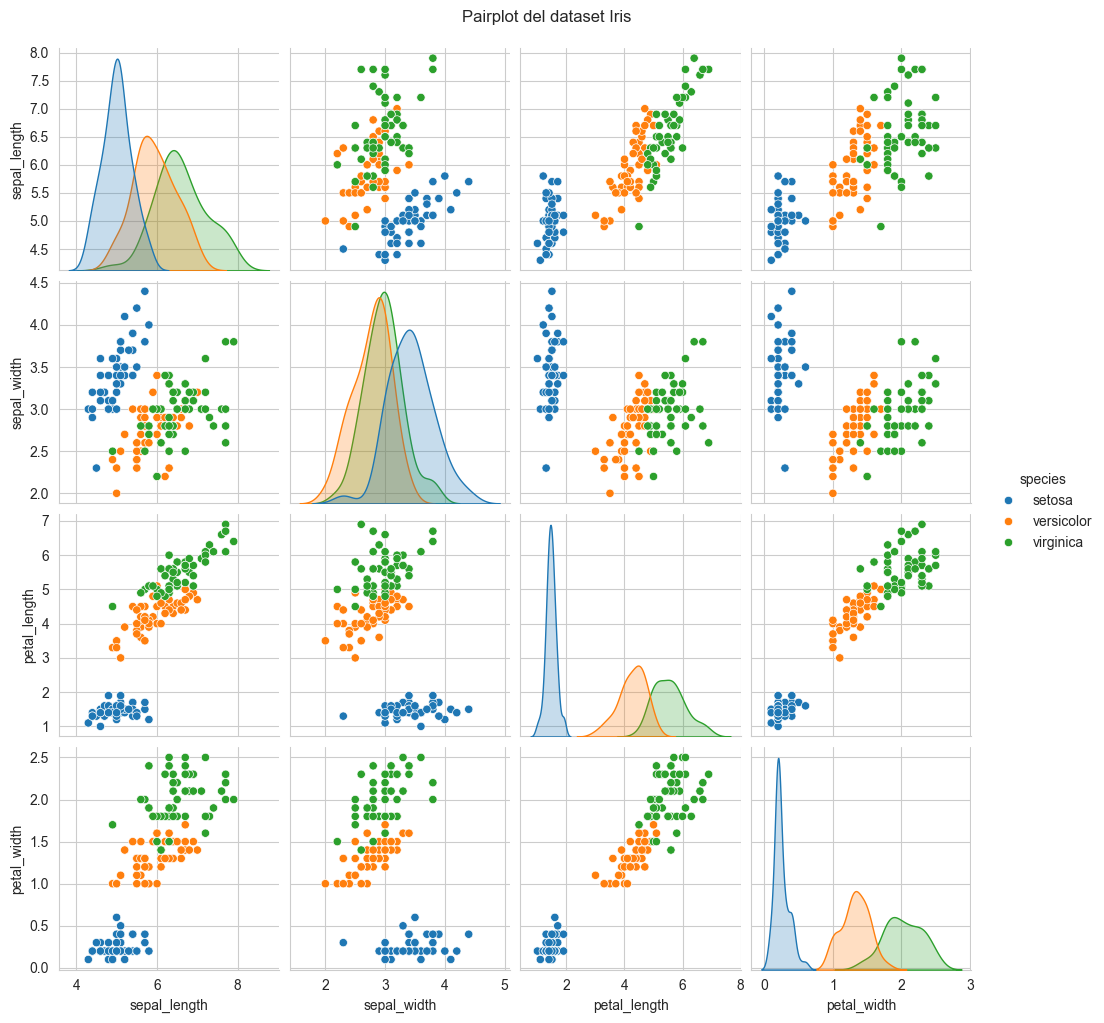

In [70]:
# Cargar dataset iris
iris = sns.load_dataset('iris')

# 1. Univariado: Histograma y boxplot de largo de sépalo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(iris['sepal_length'], kde=True, color='skyblue')
plt.title('Histograma de Sepal Length')

plt.subplot(1,2,2)
sns.boxplot(x=iris['sepal_length'], color='lightgreen')
plt.title('Boxplot de Sepal Length')
plt.show()

# 2. Bivariado: Scatterplot largo vs ancho de sépalo
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width por especie')
plt.show()

# 3. Multivariado: Pairplot completo
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.suptitle('Pairplot del dataset Iris', y=1.02)
plt.show()


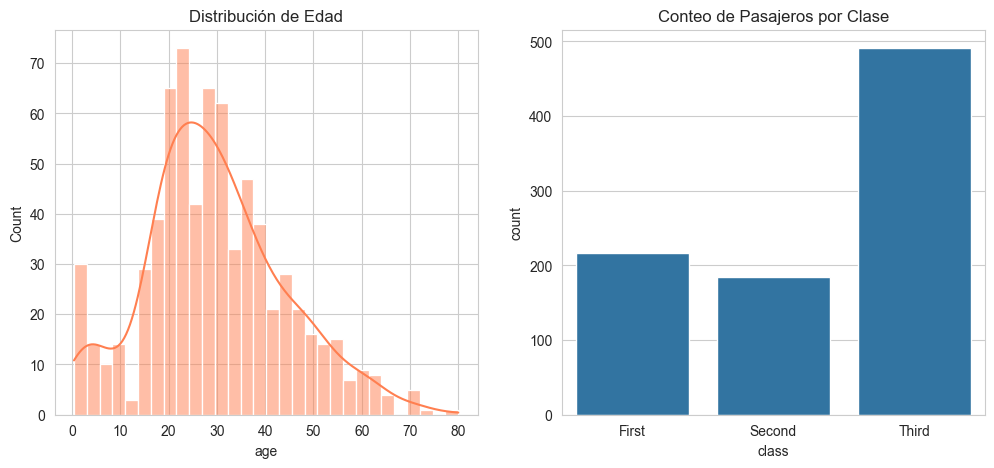

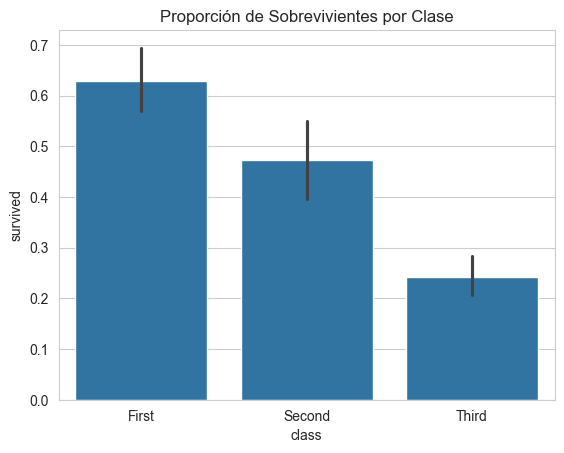

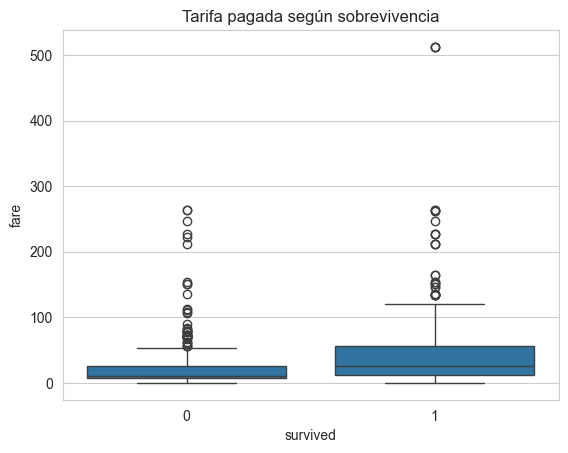

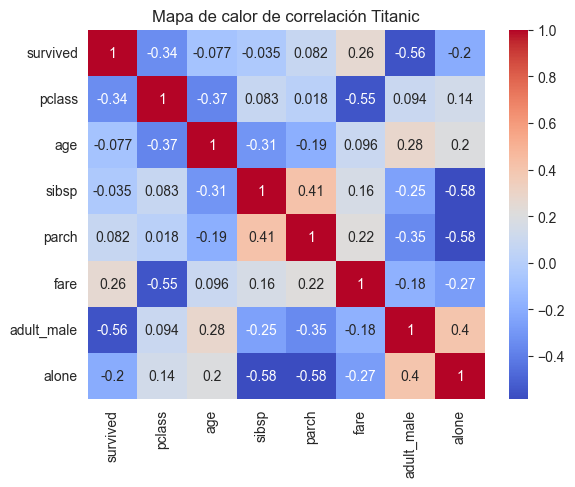

In [71]:
titanic = sns.load_dataset('titanic')

# Univariado
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(titanic['age'], bins=30, kde=True, color='coral')
plt.title('Distribución de Edad')

plt.subplot(1,2,2)
sns.countplot(x='class', data=titanic)
plt.title('Conteo de Pasajeros por Clase')
plt.show()

# Bivariado
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Proporción de Sobrevivientes por Clase')
plt.show()

# Multivariado
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Tarifa pagada según sobrevivencia')
plt.show()

# Heatmap corregido
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación Titanic')
plt.show()


In [72]:
# titanic = sns.load_dataset('titanic')

# # 1. Eliminar columnas con demasiados nulos o irrelevantes
# titanic.drop(columns=['deck', 'alive', 'class', 'who'], inplace=True)

# # 2. Rellenar valores nulos
# titanic['age'].fillna(titanic['age'].median(), inplace=True)
# titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
# titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# # 3. Verificar que ya no haya valores nulos
# print(titanic.isnull().sum())

# # 4. Mostrar estructura final
# print(titanic.info())